In [1]:
import math
from collections import Counter

# Given dataset for 'buys_computer' column (target)
buys_computer = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
                 'yes', 'yes', 'yes', 'yes', 'yes', 'no']

# Given datasets for 'age', 'income', 'student', and 'credit_rating' attributes
age_data = ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40',
            '<=30', '>40', '<=30', '31...40', '31...40', '>40']
income_data = ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'low', 'medium', 'medium',
               'medium', 'high', 'medium', 'medium', 'high', 'medium']
student_data = ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes',
                'yes', 'yes', 'yes', 'no', 'no', 'no']
credit_rating_data = ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent',
                      'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent',
                      'excellent', 'fair', 'excellent']

# Function to calculate entropy
def entropy(labels):
    total_count = len(labels)
    label_counts = Counter(labels)
    entropy_val = 0
    for count in label_counts.values():
        prob = count / total_count
        entropy_val -= prob * math.log2(prob)
    return entropy_val

# Function to calculate entropy for a feature
def feature_entropy(data, labels):
    total_count = len(labels)
    feature_counts = Counter([item[0] for item in data])

    feature_entropy_val = 0
    for feature_val, count in feature_counts.items():
        subset = [labels[i] for i, item in enumerate(data) if item[0] == feature_val]
        subset_entropy = entropy(subset)
        feature_entropy_val += (count / total_count) * subset_entropy
    return feature_entropy_val

# Combine each feature with the 'buys_computer' column for calculation
data_age_buys_computer = list(zip(age_data, buys_computer))
data_income_buys_computer = list(zip(income_data, buys_computer))
data_student_buys_computer = list(zip(student_data, buys_computer))
data_credit_buys_computer = list(zip(credit_rating_data, buys_computer))

# Calculate entropy of the target ('buys_computer')
target_entropy = entropy(buys_computer)

# Calculate entropy and information gain for 'age'
age_entropy = feature_entropy(data_age_buys_computer, buys_computer)
info_gain_age = target_entropy - age_entropy

# Calculate entropy and information gain for 'income'
income_entropy = feature_entropy(data_income_buys_computer, buys_computer)
info_gain_income = target_entropy - income_entropy

# Calculate entropy and information gain for 'student'
student_entropy = feature_entropy(data_student_buys_computer, buys_computer)
info_gain_student = target_entropy - student_entropy

# Calculate entropy and information gain for 'credit_rating'
credit_entropy = feature_entropy(data_credit_buys_computer, buys_computer)
info_gain_credit = target_entropy - credit_entropy

# Output the results
print(f"Entropy of target (buys_computer): {target_entropy}")
print(f"Information Gain for 'age': {info_gain_age}")
print(f"Information Gain for 'income': {info_gain_income}")
print(f"Information Gain for 'student': {info_gain_student}")
print(f"Information Gain for 'credit_rating': {info_gain_credit}")

# Determine the attribute with the highest information gain
info_gains = {
    "age": info_gain_age,
    "income": info_gain_income,
    "student": info_gain_student,
    "credit_rating": info_gain_credit
}

best_feature = max(info_gains, key=info_gains.get)
print(f"Best feature to split on: {best_feature}")


Entropy of target (buys_computer): 0.8960382325345574
Information Gain for 'age': 0.17667729476412386
Information Gain for 'income': 0.08375933113770517
Information Gain for 'student': 0.07970110824578913
Information Gain for 'credit_rating': 0.12425601093475913
Best feature to split on: age


Training Set Accuracy: 1.0
Depth of the Tree: 4


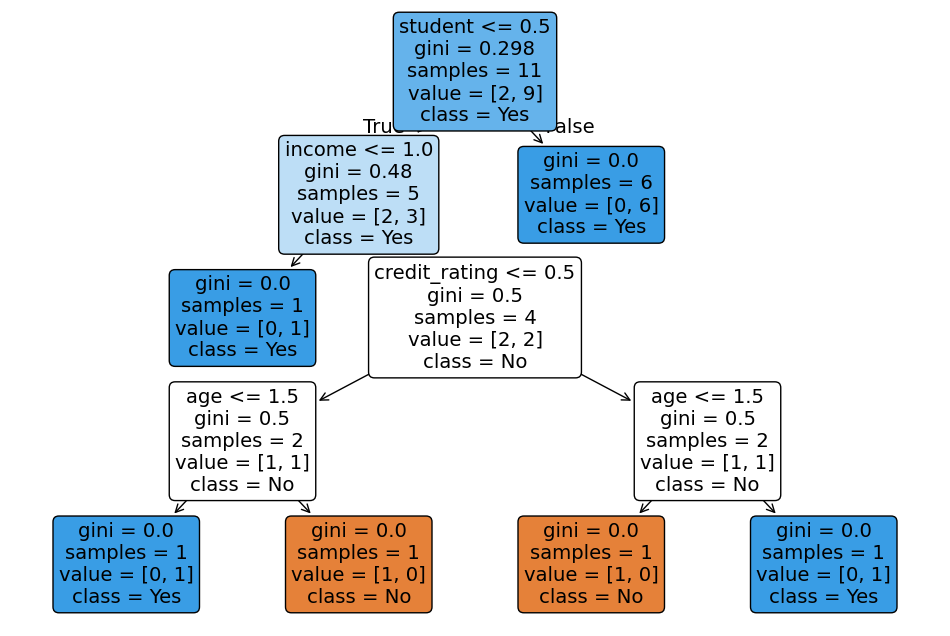

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Manually input the data from the image
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Encode the categorical variables
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Split the dataset into features (X) and target (y)
X = df.drop('buys_computer', axis=1)  # Feature set
y = df['buys_computer']  # Target labels

# Split the data into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

# Fit the model with the training data
model.fit(Tr_X, Tr_y)

# Evaluate the model on the training set
train_accuracy = model.score(Tr_X, Tr_y)
print(f"Training Set Accuracy: {train_accuracy}")

# Get the depth of the constructed decision tree
tree_depth = model.get_depth()
print(f"Depth of the Tree: {tree_depth}")

# Visualize the constructed tree
plt.figure(figsize=(12, 8))  # Set the size of the figure
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()


Depth of the Tree: 4


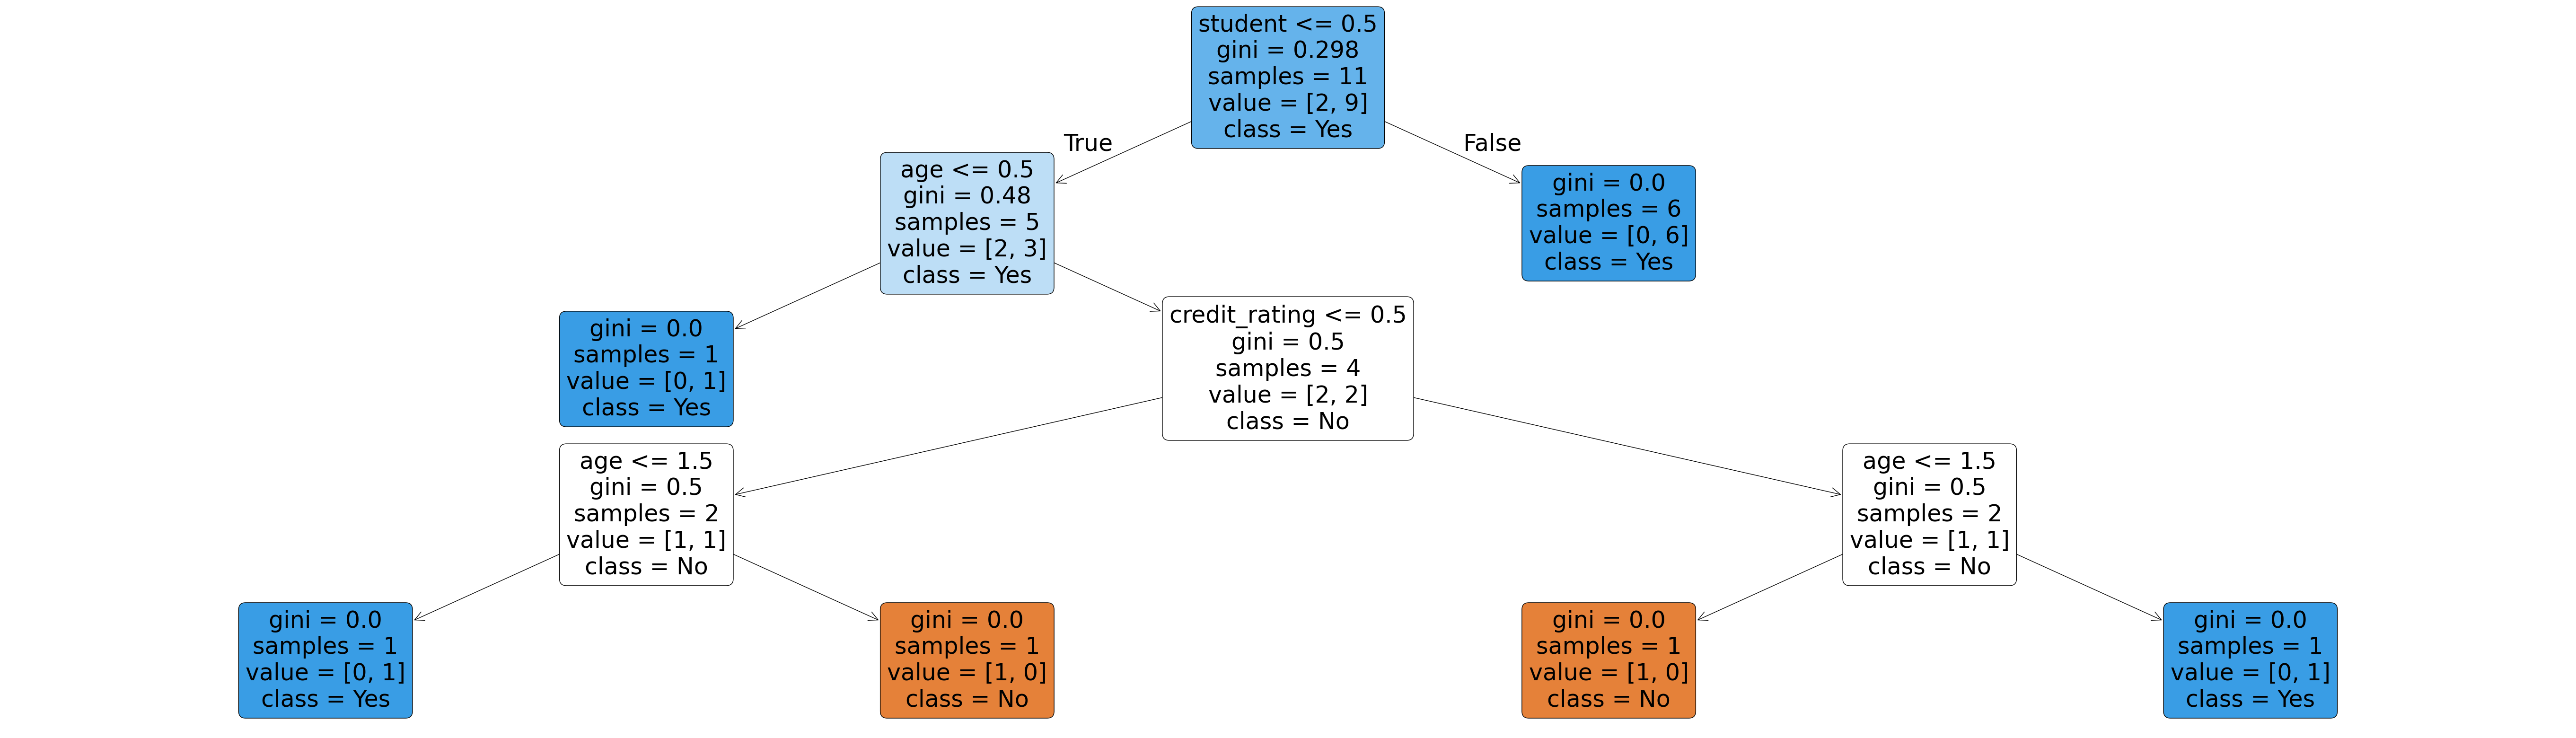

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Manually input the data from the image
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Encode the categorical variables into numerical format
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Split the dataset into features (X) and target (y)
X = df.drop('buys_computer', axis=1)  # Feature set
y = df['buys_computer']  # Target labels

# Split the data into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

# Fit the model with the training data
model.fit(Tr_X, Tr_y)

# Get the depth of the constructed decision tree
tree_depth = model.get_depth()
print(f"Depth of the Tree: {tree_depth}")

# Visualize the constructed tree
plt.figure(figsize=(70, 20))  # Set the size of the figure
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()
